# finance模块

matplotlib.finance是matplotlib包中唯一和图形图像没啥关系的一个模块

它可以用于收集，分析和绘制财务数据的功能集合

In [1]:
import matplotlib.pyplot as plt
from matplotlib.finance import quotes_historical_yahoo_ochl ,fetch_historical_yahoo,quotes_historical_yahoo_ohlc
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter  ,WeekdayLocator,MONDAY,DayLocator
from matplotlib.finance import parse_yahoo_historical_ochl,parse_yahoo_historical_ohlc
import datetime  
import numpy as np

C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
%matplotlib inline

In [3]:
plt.style.use('chinese_support')

OSError: 'chinese_support' not found in the style library and input is not a valid URL or path. See `style.available` for list of available styles.

## 数据获取:

+ ### `matplotlib.finance.fetch_historical_yahoo(ticker, date1, date2, cachename=None, dividends=False)`

在date1和date2之间获取代码的历史数据。date1和date2是日期或datetime实例，或（年，月，日）序列。
其中`dividends = True`则返回股息而不是价格数据。使用此选项设置，解析函数将不工作.它返回一个打开的file对象,以标普500为例

In [4]:
with fetch_historical_yahoo('^GSPC', (2000, 1, 1), (2001, 12, 31)) as fh:
    print fh.readlines()[:5]

['Date,Open,High,Low,Close,Volume,Adj Close\n', '2001-12-31,1161.02002,1161.160034,1148.040039,1148.079956,943600000,1148.079956\n', '2001-12-28,1157.130005,1164.640015,1157.130005,1161.02002,917400000,1161.02002\n', '2001-12-27,1149.369995,1157.130005,1149.369995,1157.130005,876300000,1157.130005\n', '2001-12-26,1144.650024,1159.180054,1144.650024,1149.369995,791100000,1149.369995\n']


因为获取的是文件类型,finance模块还提供了解析工具

+ `matplotlib.finance.parse_yahoo_historical_ohlc(fh, adjusted=True, asobject=False)`

    输出对应(时间戳,开市,最高,最低,闭市,成交量)
    
    
+ `matplotlib.finance.parse_yahoo_historical_ochl(fh, adjusted=True, asobject=False)`

    输出对应(时间戳,开市,闭市,最高,最低,成交量)


In [5]:
with fetch_historical_yahoo('^GSPC', (2015, 12, 20), (2016, 12, 20)) as fh:
    print parse_yahoo_historical_ohlc(fh)[:5]
    

[(735953.0, 2010.2700199999999, 2022.900024, 2005.9300539999999, 2021.150024, 3760280000.0), (735954.0, 2023.150024, 2042.73999, 2020.48999, 2038.969971, 3520860000.0), (735955.0, 2042.1999510000001, 2064.7299800000001, 2042.1999510000001, 2064.290039, 3484090000.0), (735956.0, 2063.5200199999999, 2067.360107, 2058.7299800000001, 2060.98999, 1411860000.0), (735960.0, 2057.7700199999999, 2057.7700199999999, 2044.1999510000001, 2056.5, 2492510000.0)]


In [6]:
with fetch_historical_yahoo('^GSPC', (2015, 12, 20), (2016, 12, 20)) as fh:
    print parse_yahoo_historical_ochl(fh)[:5]

[(735953.0, 2010.2700199999999, 2021.150024, 2022.900024, 2005.9300539999999, 3760280000.0), (735954.0, 2023.150024, 2038.969971, 2042.73999, 2020.48999, 3520860000.0), (735955.0, 2042.1999510000001, 2064.290039, 2064.7299800000001, 2042.1999510000001, 3484090000.0), (735956.0, 2063.5200199999999, 2060.98999, 2067.360107, 2058.7299800000001, 1411860000.0), (735960.0, 2057.7700199999999, 2056.5, 2057.7700199999999, 2044.1999510000001, 2492510000.0)]


而下两个则是直接返回解析好的结果

+ `matplotlib.finance.quotes_historical_yahoo_ochl(ticker, date1, date2, asobject=False, adjusted=True, cachename=None)`

+ `matplotlib.finance.quotes_historical_yahoo_ohlc(ticker, date1, date2, asobject=False, adjusted=True, cachename=None)`

In [7]:
quotes_historical_yahoo_ochl('^GSPC', (2015, 12, 20), (2016, 12, 20))[:2]

[(735953.0,
  2010.2700199999999,
  2021.150024,
  2022.900024,
  2005.9300539999999,
  3760280000.0),
 (735954.0, 2023.150024, 2038.969971, 2042.73999, 2020.48999, 3520860000.0)]

In [8]:
quotes_historical_yahoo_ohlc('^GSPC', (2015, 12, 20), (2016, 12, 20))[:2]

[(735953.0,
  2010.2700199999999,
  2022.900024,
  2005.9300539999999,
  2021.150024,
  3760280000.0),
 (735954.0, 2023.150024, 2042.73999, 2020.48999, 2038.969971, 3520860000.0)]

## 绘制k线图

### 以价格为参数的方法

+ `matplotlib.finance.candlestick2_ochl(ax, opens, closes, highs, lows, width=4, colorup='k', colordown='r', alpha=0.75)`
    输入对应(时间戳,开市,闭市,最高,最低,成交量)

+ `matplotlib.finance.candlestick2_ohlc(ax, opens, highs, lows, closes, width=4, colorup='k', colordown='r', alpha=0.75)`
    输入对应(时间戳,开市,最高,最低,闭市,成交量)

### 以解析出来的原始序列为参数

+ `matplotlib.finance.candlestick_ochl(ax, quotes, width=0.2, colorup='k', colordown='r', alpha=1.0)`
    输入对应(时间戳,开市,闭市,最高,最低,成交量)

+ `matplotlib.finance.candlestick_ohlc(ax, quotes, width=0.2, colorup='k', colordown='r', alpha=1.0)`
    输入对应(时间戳,开市,最高,最低,闭市,成交量)

In [9]:
from matplotlib.finance import candlestick2_ochl,candlestick2_ohlc,candlestick_ochl,candlestick_ohlc

In [10]:
#设置x轴坐标刻度
mondays = WeekdayLocator(MONDAY)            # 主要刻度
alldays = DayLocator()                      # 次要刻度

mondayFormatter = DateFormatter('%m-%d-%Y') # 如：2-29-2015
dayFormatter = DateFormatter('%d')  

In [11]:
# 数据处理
quotes_ochl = quotes_historical_yahoo_ochl('^GSPC', (2015, 12, 20), (2016, 6, 20))

ochl = np.array(quotes_ochl).T[1:-1]
quotes_ohlc = quotes_historical_yahoo_ohlc('^GSPC', (2015, 12, 20), (2016, 6, 20))
ohlc = np.array(quotes_ohlc).T[1:-1]



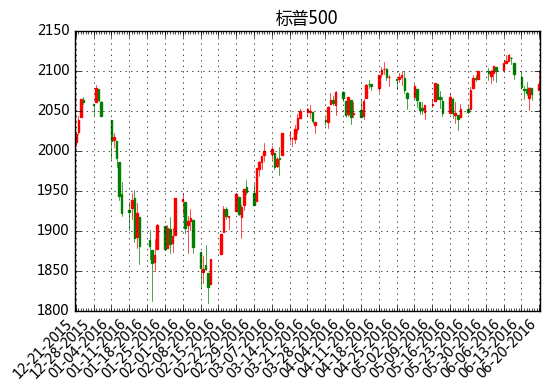

In [12]:
# 设置x坐标轴
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)

ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(mondayFormatter)
            
    
# 绘制图形
candlestick_ohlc(ax, quotes_ohlc, width=0.6, colorup='r', colordown='g')
ax.xaxis_date()
ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

ax.grid(True)
plt.title(u'标普500')
plt.show()

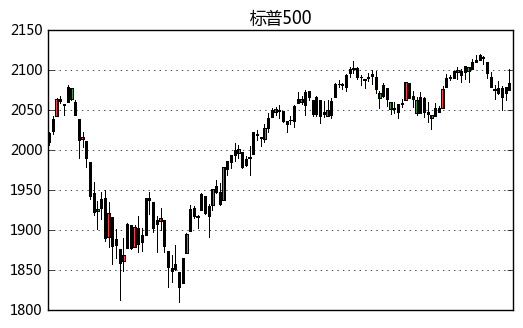

In [13]:
# 设置x坐标轴
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)

ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(mondayFormatter)
            
    
# 绘制图形
o,h,l,c = ohlc
candlestick2_ohlc(ax, o,h,l,c , width=0.6, colorup='r', colordown='g')
ax.xaxis_date()
ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

ax.grid(True)
plt.title(u'标普500')
plt.show()

## 绘制天的数据

这种图的上下柱是交易的最高最低值,而侧柱则表示开盘价和收盘价

### 以价格为参数的方法

+ `matplotlib.finance.plot_day_summary2_ochl(ax, opens, closes, highs, lows, ticksize=4, colorup='k', colordown='r')`

+ `matplotlib.finance.plot_day_summary2_ohlc(ax, opens, highs, lows, closes, ticksize=4, colorup='k', colordown='r')`

### 以解析出来的原始序列为参数

+ `matplotlib.finance.plot_day_summary_oclh(ax, quotes, ticksize=3, colorup='k', colordown='r')`

+ `matplotlib.finance.plot_day_summary_ohlc(ax, quotes, ticksize=3, colorup='k', colordown='r')`

In [14]:
from matplotlib.finance import plot_day_summary_oclh

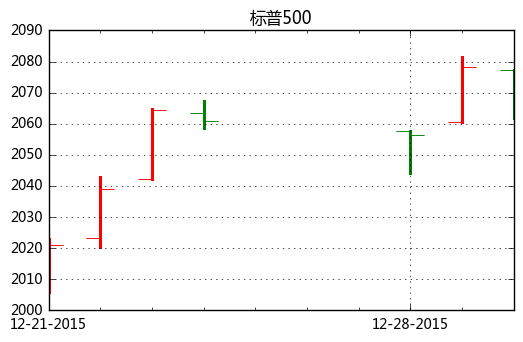

In [15]:
# 设置x坐标轴
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)

ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(mondayFormatter)

plot_day_summary_oclh(ax,quotes_ochl[:7], ticksize= 10,colorup='r', colordown='g')
ax.xaxis_date()
ax.autoscale_view()
#plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

ax.grid(True)
plt.title(u'标普500')
plt.show()

## 成交量相关的图形

+ `matplotlib.finance.index_bar(ax, vals, facecolor='b', edgecolor='l', width=4, alpha=1.0)`

+ `matplotlib.finance.volume_overlay(ax, opens, closes, volumes, colorup='k', colordown='r', width=4, alpha=1.0)`

+ `matplotlib.finance.volume_overlay2(ax, closes, volumes, colorup='k', colordown='r', width=4, alpha=1.0)`

+ `matplotlib.finance.volume_overlay3(ax, quotes, colorup='k', colordown='r', width=4, alpha=1.0)`

In [16]:
from matplotlib.finance import index_bar,volume_overlay3

In [17]:
volume = np.array(quotes_ochl).T[-1]/10000000000

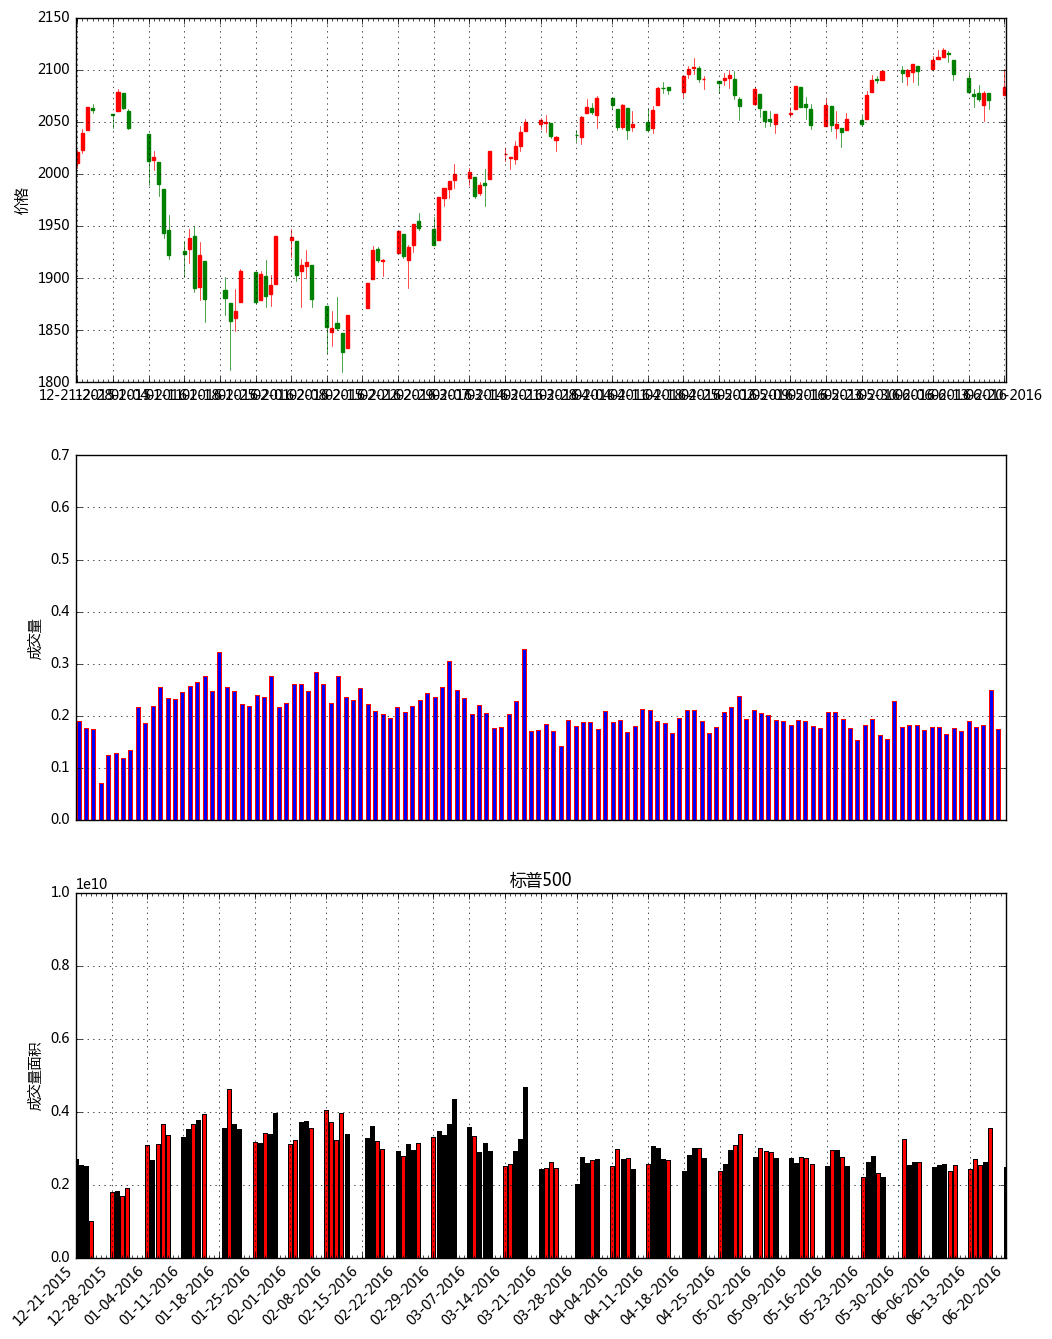

In [54]:
#fig = plt.figure(figsize=(12,16))


fig ,subplots=plt.subplots(3,1)
plt.title(u'标普500')

fig.set_size_inches((12,16))
for i,ax in enumerate(subplots):
    ax.xaxis.set_major_locator(mondays)
    ax.xaxis.set_minor_locator(alldays)
    ax.xaxis.set_major_formatter(mondayFormatter)
    if i == 0:
        ax.set_ylabel(u'价格')

        candlestick_ohlc(ax, quotes_ohlc, width=0.6, colorup='r', colordown='g')        
    elif i ==1:
        ax.set_ylabel(u'成交量')
       
        index_bar(ax,volume,facecolor='b', edgecolor='r')
    else:
        ax.set_ylabel(u'成交量面积')
        ax.set_ylim((0, 1e10))
        
        v = volume_overlay3(ax, quotes_ohlc)
    
        
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.grid(True)
plt.show()